# 基于 mplfinance & matplotlib 的 k 线图画法

学习股票分析的第一步：

基于最普遍使用的 python 库，画出个股的 k 线图。

技术基本面：

- matplotlib：jupyter 里最常用的作图库，功能丰富，社区庞大。
- mplfinance：matplotlib.finance 独立出来，并进行了 API 重构。

    matplotlib utilities for the visualization, and visual analysis, of financial data

弊端：

1. 交互性差。需要使用基于 web html 类的方案。比如 Pyecharts 等

In [1]:
import tushare as ts
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import datetime
import pandas as pd

# import mpl_finance as mpf
from mplfinance.original_flavor import candlestick_ohlc

%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
plt.rcParams['figure.figsize'] = [15, 5]

# tushare 免费 API 获取历史数据

In [3]:
st_code = '601318'
st_name = '中国平安'
st = ts.get_hist_data(st_code)
st.head()

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
date,,,,,,,,,,,,,,
2020-08-13,77.50,77.60,76.60,76.51,421355.47,-0.56,-0.73,76.774,76.916,77.641,606511.87,755315.80,808329.45,0.39
2020-08-12,76.80,77.46,77.16,76.40,586012.62,0.39,0.51,76.884,76.859,77.722,651753.37,777804.57,853170.18,0.54
2020-08-11,77.45,78.68,76.77,76.51,775309.00,-0.24,-0.31,76.878,76.873,77.875,692112.04,789489.84,870007.94,0.72
2020-08-10,76.02,77.69,77.01,75.82,700073.25,0.68,0.89,77.258,76.834,78.101,833342.56,775944.81,880670.39,0.65
2020-08-07,76.96,77.67,76.33,76.01,549809.00,-0.82,-1.06,77.144,76.776,78.369,864377.44,779417.38,904642.52,0.51


In [4]:
# 数据条数（天）
st.size

8484

# 数据可视化 - 收盘价走势图

In [5]:
date_list=[]
close_list=[]
for dates, row in st.iterrows():
    date_time = datetime.datetime.strptime(dates,'%Y-%m-%d')
    t = date2num(date_time)
    close = row[3]
    date_list.append(t)
    close_list.append(close)

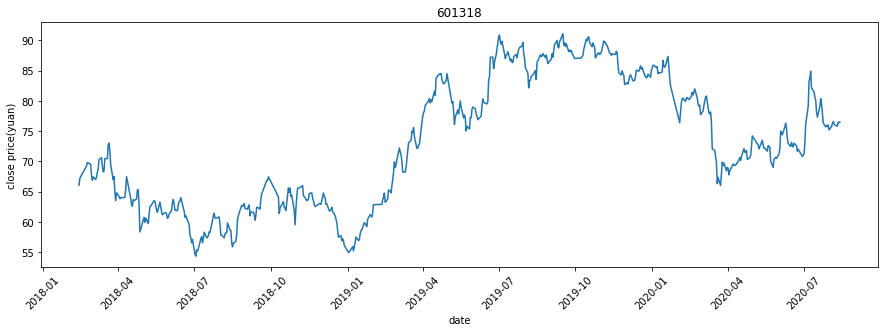

In [6]:
fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
# 设置X轴为日期时间
ax.xaxis_date()
plt.xticks(rotation=45)
plt.yticks()
plt.title(st_code)
plt.xlabel("date")
plt.ylabel("close price(yuan)")
plt.plot(date_list,close_list)

# 日 K 图绘制

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


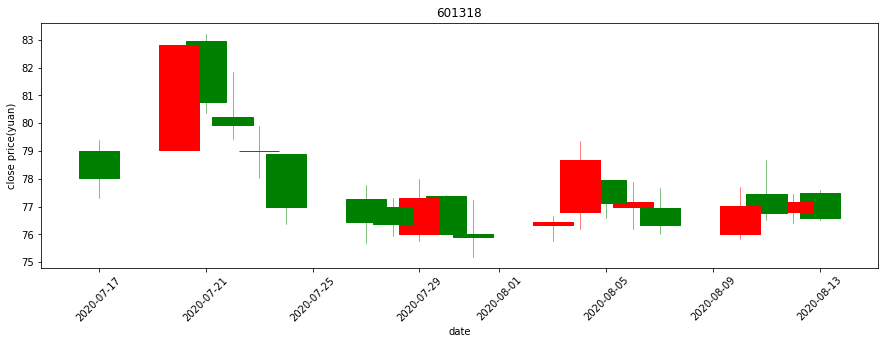

In [7]:
hist_data = ts.get_hist_data(st_code)
data_list = []
for dates, row in hist_data.iterrows():
    # 将时间转换为数字
    date_time = datetime.datetime.strptime(dates,'%Y-%m-%d')
    t = date2num(date_time)
    #注意tushare数据的顺序和candlestick_ohlc函数参数的默认顺序不一样
    open = row[0]
    high = row[1]
    low = row[3]
    close = row[2]
    datas = (t,open,high,low,close)
    data_list.append(datas)
# 创建子图
fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
# 设置X轴刻度为日期时间
ax.xaxis_date()

plt.xticks(rotation=45)
plt.yticks()
plt.title(st_code)
plt.xlabel("date")
plt.ylabel("close price(yuan)")

candlestick_ohlc(ax, data_list[:20], width=1.5,colorup='r',colordown='green')

plt.show()

有那么点意思了。

但这个 K 线图信息量过少，而且，相邻两天的矩形相互覆盖，很难看。